# Introduction

The data analyzed in this report is the information of each patient who took the health-improving new vaccine of Alitech. The purpose of the analysis is to ascertain the average effect, if any, on the health of the patients who took it. 

The null hypothesis of 'no effect', in this case, is that the vaccine had no effect on the health of the patients whatsoever.

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Load the data from the CSV file
df = pd.read_csv('patient_health_data.csv')

# Display the first few rows of the DataFrame to verify
print(df.head())

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84


### Data visualization

A convenient and concise way to understand the effect of the vaccine, be it positive, negative, or null, is to see the change in initial and final health scores of each patient. This means that the the effect can be quantified in a positive number (an increase in the patient's health score) or a negative number (a decrease in the patient's health score). In these data points, there is no instance where the health scores does not change.

The bar plot below is just a simple way to visualize the data. It plots the health score difference against the patient ID. The data set only contains 10 data points, which can all be visualized clearly in the chart below.

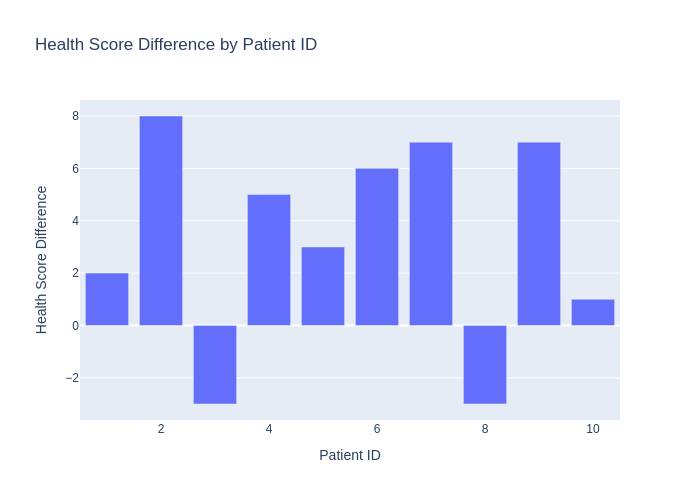

In [11]:
"""
Calculating the improvement in the patients' health scores by subtracting the initial health score from
the final health score, in order to get the improvement in health after taking the vaccine.
"""

df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

"""
Building a bar chart to represent each patient and the change in their health score after taking the vaccine,
either negative or positive. (This is just to visualize the results.)
"""

fig = px.bar(df, x='PatientID', y='HealthScoreDifference', 
             title='Health Score Difference by Patient ID',
             labels={'HealthScoreDifference': 'Health Score Difference', 'PatientID': 'Patient ID'})

fig.show(renderer = 'png')

### Methodology

The analysis process starts by bootstrapping the data and creating a thousand samples. Afterward, a distribution of the sampled means, that is, the mean of each of the bootstrapped samples, is constructed.

The code below provides a visualization of the distribution of the sampled means.

At the bottom, a 95% confidence interval is built based on the data from the sampled means distribution, utilizing the `np.quantile()` function as opposed to using the classic confidence interval formula.



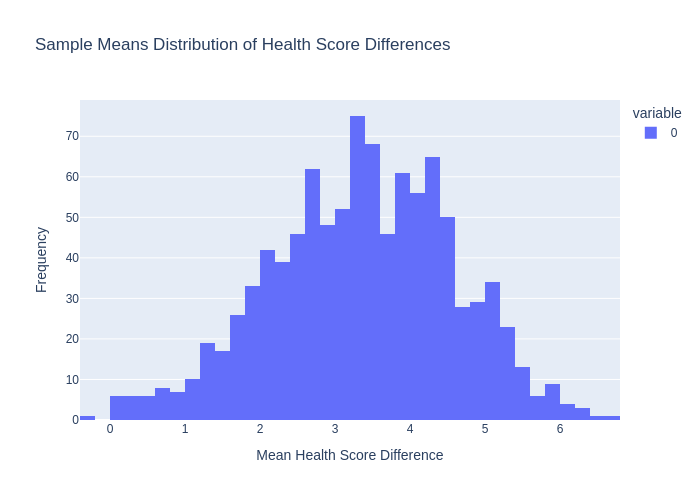

In [12]:
"""
Bootstrapping the data and building a sample mean distribution of the health score
differences, which show the quantitative effect of the vaccine on each patient.
"""

# Define a function that builds the samples and sets a seed.
def bootstrap_sample(data, n_samples, seed=None):
    if seed is not None:
        np.random.seed(seed)
    samples = np.random.choice(data, size=(n_samples, len(data)), replace=True)
    return samples

# Create 1000 bootstrap samples with a seed (to be able to reproduce the same results)
bootstrap_samples = bootstrap_sample(df['HealthScoreDifference'].values, 1000, seed=42)

bootstrap_means = np.mean(bootstrap_samples, axis=1)

# This is the visual representation of the sample mean distribution on health score differences.
fig = px.histogram(bootstrap_means, nbins=50, title='Sample Means Distribution of Health Score Differences')
fig.update_layout(xaxis_title='Mean Health Score Difference', yaxis_title='Frequency')
fig.show(renderer = 'png')

In [10]:
"""
There are two ways to calculate the 95% confidence interval. The easiest way is to use the np.quantile function
to determine the interval.
"""

bootstrap_confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval: {bootstrap_confidence_interval}")

95% Bootstrap Confidence Interval: [0.7 5.5]


### Findings and Further Considerations

Firstly, the confidence interval does not overlap zero, meaning that the null hypothesis can be safely rejected. It can safely be assumed that the mean of the population tends toward there being a positive effect on the health scores of every patient who took the vaccine. 

Some limitations in this report are the exclusion of gender and age, which can very well be driving factors in the overall effects of the vaccine. Due to the limited amount of data points and the scope of the report, these could not be explored. A future analysis could repeat this same methodology multiple times to amount for the sex and age difference.

## Usage of Microsoft Copilot

The majority of the code was written with the help of microsoft copilot. Here is the summary of the conversation with the chatbot.

### Summary of Our Conversation

1. **Project Overview**:
   - You are working on a data analysis project using Python and Plotly.
   - The main objective is to bootstrap some data and build a confidence interval from the sample.

2. **Data Provided**:
   - You provided a dataset with the following columns: `PatientID`, `Age`, `Gender`, `InitialHealthScore`, and `FinalHealthScore`.
   - The dataset includes health scores for 10 patients before and after a certain period or treatment.

3. **Loading Data**:
   - We discussed how to load the data from a CSV file using the `pandas` library.
   - Ensured the CSV file is in the same directory as the Python script for easy loading.

4. **Calculating Health Score Difference**:
   - We calculated the difference between `InitialHealthScore` and `FinalHealthScore` for each patient.
   - Added a new column `HealthScoreDifference` to the DataFrame to store these values.

5. **Bootstrap Sampling**:
   - We performed bootstrap sampling on the `HealthScoreDifference` data points.
   - Created 1000 bootstrap samples to estimate the distribution of the sample means.
   - Used a seed (`seed=42`) to ensure the experiment is replicable.

6. **Visualizing Data**:
   - Created a histogram using Plotly to visualize the distribution of the bootstrap means.
   - The histogram helps in understanding the spread and central tendency of the bootstrap sample means.

7. **Confidence Interval Calculation**:
   - Calculated the 95% confidence interval using the bootstrap method by finding the 2.5th and 97.5th percentiles of the bootstrap means.
   - Also calculated the traditional 95% confidence interval using the formula:
     $$
     CI = \bar{x} \pm z \left(\frac{\sigma}{\sqrt{n}}\right)
     $$
   - Compared both methods to understand the range within which the true mean of the health score differences lies.
